<h1>Импорт библиотек

In [142]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [143]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result_matrix = np.zeros(len(V[0]), dtype = float)
    for matrix, vector in zip(X, V):
        result_matrix += np.array(matrix) @ np.array(vector)
    return result_matrix

def test_sum_prod():
    X = [[[1, 2], [3, 4]], [[5, 6], [7, 8]]]
    V = [[1, 0], [0, 1]]
    assert np.array_equal(sum_prod(X, V), [7, 11])
    
    X = [[[1, 0], [0, 1]], [[1, 0], [0, 1]]]
    V = [[1, 1], [1, 1]]
    assert np.array_equal(sum_prod(X, V), [2, 2])

    X = [[[0, 0], [0, 0]], [[1, 2], [3, 4]]]
    V = [[1, 0], [0, 1]]
    assert np.array_equal(sum_prod(X, V), [2, 4])
    
    X = [[[1, 2], [3, 4]], [[1, 2], [3, 4]]]
    V = [[0, 0], [0, 0]]
    assert np.array_equal(sum_prod(X, V), [0, 0])

    X = [[[1, 2], [3, 4]], [[1, 2], [3, 4]]]
    V = [[1, 2], [3, 4]]
    assert np.array_equal(sum_prod(X, V), [16, 36])
    
if __name__ == "__main__":
    test_sum_prod()

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [144]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    M = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    threshold = 5
    result = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
    assert np.array_equal(binarize(M, threshold), result)
    
    M = np.array([[1, 0], [0, 1]])
    threshold = 0.5
    result = [[1, 0], [0, 1]]
    assert np.array_equal(binarize(M, threshold), result)
    
    M = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
    threshold = 3
    result = [[0, 0, 0], [0, 1, 1], [1, 1, 1]]
    assert np.array_equal(binarize(M, threshold), result)

    M = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
    threshold = 0.5
    result = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
    assert np.array_equal(binarize(M, threshold), result)

    M = np.array([[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]])
    threshold = 0.5
    result = [[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]
    assert np.array_equal(binarize(M, threshold), result)
    
if __name__ == "__main__":
    test_binarize()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [145]:
def unique_rows(mat):
    return np.array([np.unique(row) for row in mat])

def unique_columns(mat):
    if mat.shape[0] == 0:
        return np.array([])
    return np.array([np.unique(mat[:, col]) for col in range(mat.shape[1])])

def test_unique():
    mat = np.array([[1, 2, 2], [3, 3, 4], [5, 6, 6]])
    result_rows = [[1, 2], [3, 4], [5, 6]]
    result_columns = [[1, 3, 5], [2, 3, 6], [2, 4, 6]]
    assert np.array_equal(unique_rows(mat), result_rows)
    assert np.array_equal(unique_columns(mat), result_columns)

    mat = np.ones((3, 3))
    result_rows = [[1], [1], [1]]
    result_columns = [[1], [1], [1]]
    assert np.array_equal(unique_rows(mat), result_rows)    
    assert np.array_equal(unique_columns(mat), result_columns)

    mat = np.empty((0, 2))
    assert np.array_equal(unique_rows(mat), np.empty((0, )))    
    assert np.array_equal(unique_columns(mat), [])

if __name__ == "__main__":
    test_unique()

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

[[ 1.51908822  0.38321521 -1.39854478  0.9718943 ]
 [ 1.44755587  0.31072195  1.21572529  0.18261303]
 [-0.60232663  0.20934764 -1.2897939  -0.71918418]]
Математическое ожидание для строк [ 0.36891324  0.78915403 -0.60048927]
Дисперсия для строк [1.20265026 0.30306132 0.28626714]
Математическое ожиданеи для столбцов [ 0.78810582  0.30109493 -0.49087113  0.14510772]
Дисперсия для столбцов [0.96750401 0.00508466 1.4582068  0.47732772]


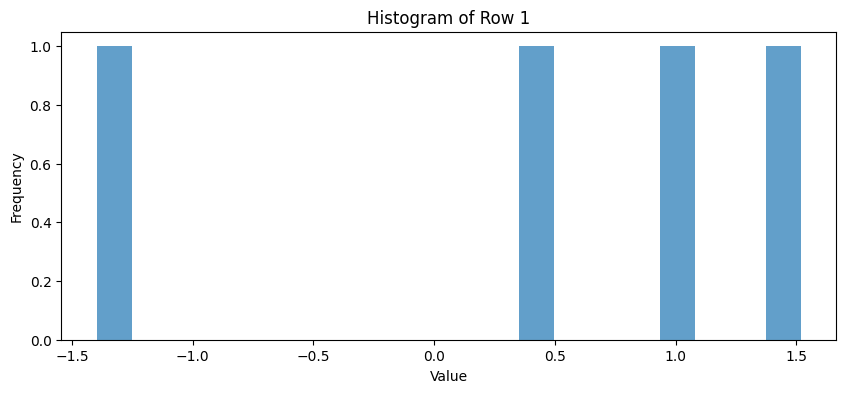

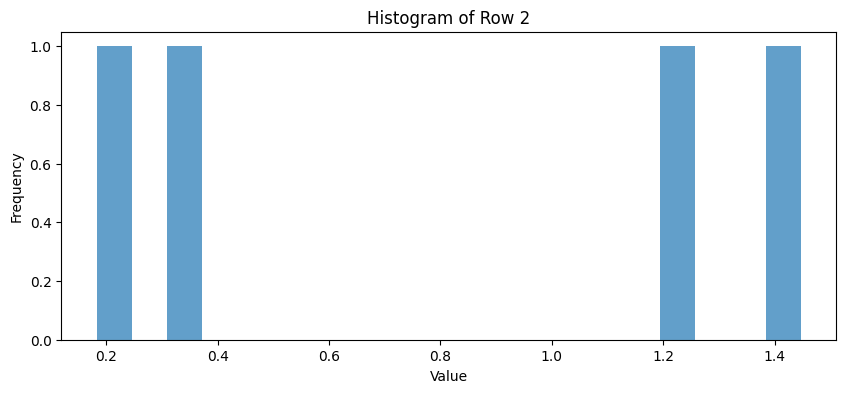

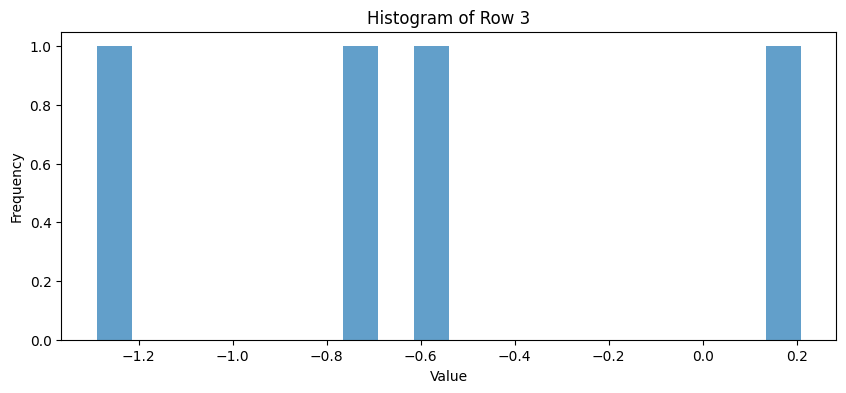

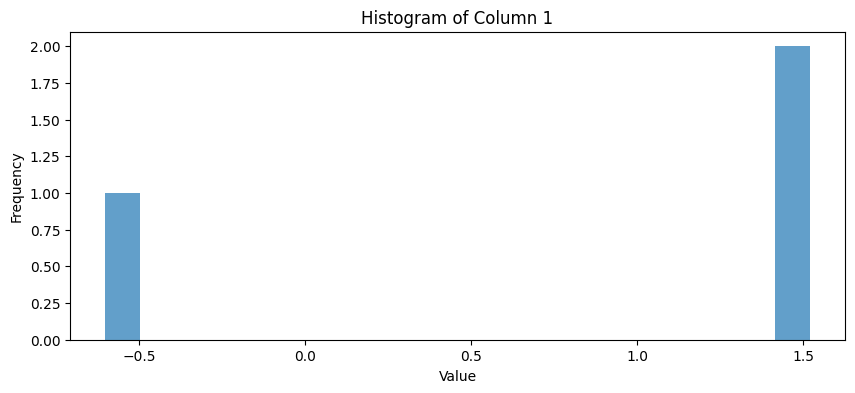

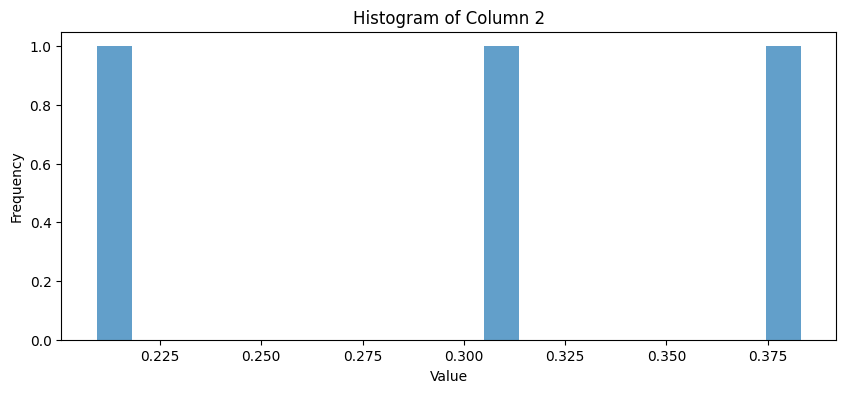

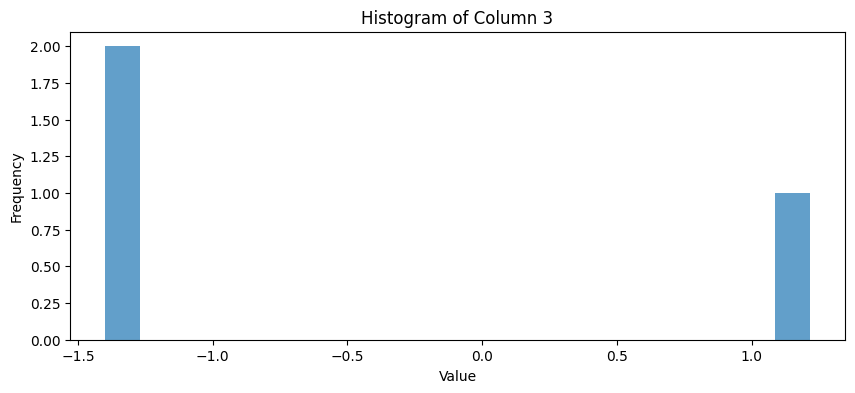

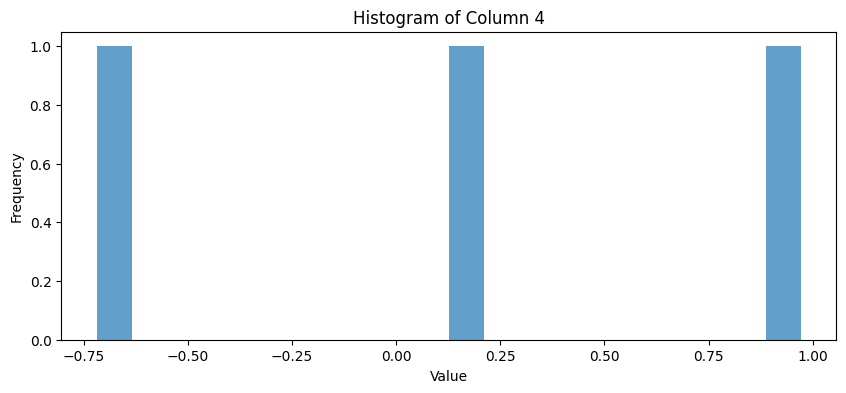

In [146]:
def generate_matrix(m, n):
    return np.random.normal(loc=0, scale=1, size=(m, n))

def plot_histograms(matrix):
    for i in range(matrix.shape[0]):
        plt.figure(figsize=(10, 4))
        plt.hist(matrix[i, :], bins=20, alpha=0.7)
        plt.title(f'Histogram of Row {i + 1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

    for j in range(matrix.shape[1]):
        plt.figure(figsize=(10, 4))
        plt.hist(matrix[:, j], bins=20, alpha=0.7)
        plt.title(f'Histogram of Column {j + 1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

if __name__ == "__main__":
    matrix = generate_matrix(3, 4)
    print(matrix)
    print("Математическое ожидание для строк", np.mean(matrix, axis=1))
    print("Дисперсия для строк", np.var(matrix, axis=1))
    print("Математическое ожиданеи для столбцов", np.mean(matrix, axis=0))
    print("Дисперсия для столбцов", np.var(matrix, axis=0))    
    plot_histograms(matrix)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [147]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    matrix[::2, ::2] = a
    matrix[1::2, 1::2] = a
    matrix[1::2, ::2] = b
    matrix[::2, 1::2] = b
    return matrix

def chess_test():
    m, n, a, b = 2, 2, 1, 2
    result = [[1, 2], [2, 1]]
    assert np.array_equal(chess(m, n, a, b), result)


    m, n, a, b = 3, 3, 1, 2
    result = [[1, 2, 1], [2, 1, 2], [1, 2, 1]]
    assert np.array_equal(chess(m, n, a, b), result)

    m, n, a, b = 2, 4, 1, 2
    result = [[1, 2, 1, 2], [2, 1, 2, 1]]
    assert np.array_equal(chess(m, n, a, b), result)

    m, n, a, b = 0, 0, 1, 2
    result = np.empty((0, 0))
    assert np.array_equal(chess(m, n, a, b), result)

if __name__ == "__main__":
    chess_test()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

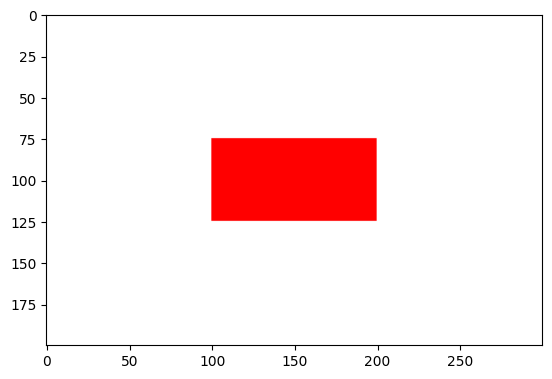

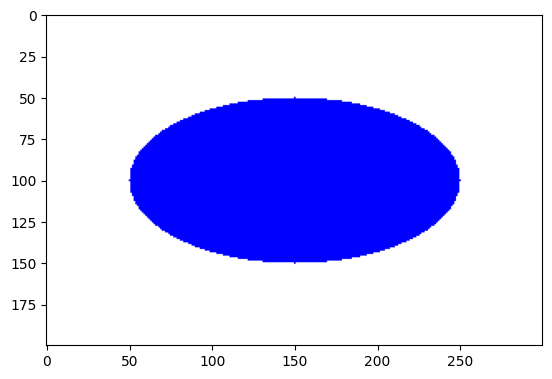

In [148]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = np.ones((n, m, 3), dtype=np.uint8)
    img[:, :] = background_color
    start_x = (m - a) // 2
    start_y = (n - b) // 2
    img[start_y:start_y+b, start_x:start_x+a] = rectangle_color
    plt.imshow(img)
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = np.ones((n, m, 3), dtype=np.uint8)
    img[:, :] = background_color
    center_x = m // 2
    center_y = n // 2
    y, x = np.ogrid[:n, :m]
    ellipse_mask = ((x - center_x) ** 2 / a ** 2 + (y - center_y) ** 2 / b ** 2) <= 1
    img[ellipse_mask] = ellipse_color
    plt.imshow(img)
    plt.show()

if __name__ == "__main__":
    draw_rectangle(100, 50, 300, 200, [255, 0, 0], [255, 255, 255])
    draw_ellipse(100, 50, 300, 200, [0, 0, 255], [255, 255, 255])

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [149]:
def find_local_extremum(series):
    local_maximum = []
    local_minimum = []
    for i in range(1, len(series) - 1):
        if ((series[i] > series[i - 1]) and (series[i] > series[i + 1])):
            local_maximum.append(i)
        elif ((series[i] < series[i - 1]) and (series[i] < series[i + 1])):
            local_minimum.append(i)

    return np.array(local_maximum), np.array(local_minimum)

def moving_average(series, window_size):
    if window_size > len(series):
        return np.array([])
    return np.convolve(series, np.ones(window_size) / window_size, mode='valid')

if __name__ == "__main__":
    series = [1, 3, 2, 5, 4, 6, 7, 3, 2, 5, 8, 10, 9, 8, 12]
    print(f"Математическое ожидание: {np.mean(series)}")
    print(f"Дисперсия: {np.var(series)}")
    print(f"СКО: {np.std(series)}")
    
    local_maximum, local_minimum = find_local_extremum(series)
    print(f"Локальные максимумы: {local_maximum}")
    print(f"Локальные минимумы: {local_minimum}")
    
    moving_avg = moving_average(series, 5)
    print(f"Скользящее среднее (p={5}): {moving_avg}")

Математическое ожидание: 5.666666666666667
Дисперсия: 9.955555555555556
СКО: 3.155242550986462
Локальные максимумы: [ 1  3  6 11]
Локальные минимумы: [ 2  4  8 13]
Скользящее среднее (p=5): [3.  4.  4.8 5.  4.4 4.6 5.  5.6 6.8 8.  9.4]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [150]:
def one_hot_encoding(vector):
    classes_count = np.max(vector) + 1
    encoder = np.zeros((len(vector), classes_count), dtype=int)
    encoder[np.arange(len(vector)), vector] = 1
    return encoder

if __name__ == "__main__":
    vector = [0, 2, 3, 0]
    print(one_hot_encoding(vector))

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
